In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
dados = pd.read_csv('./train.csv')
y_env = dados[['Survived']]

In [3]:
dados.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
dados = dados.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis =1)

In [5]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [6]:
dados['Sex'] = dados['Sex'].apply(sex)

dados = pd.get_dummies(dados)

In [7]:
#dados = dados.dropna().reset_index().drop('index',axis=1)
# tudo que for NaN vira valor Médio

def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean()+10)
        
    else:
        return x

    
dados['Age'] = dados['Age'].apply(media_age)

In [8]:
dados.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [9]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]



In [10]:
X.shape,y.shape

((891, 5), (891, 1))

In [11]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

X = scaler.fit_transform(X)

"""
y = scaler.fit_transform(y)
df = pd.DataFrame()
df['Survived'] = y[:,0]
y = df"""

"\ny = scaler.fit_transform(y)\ndf = pd.DataFrame()\ndf['Survived'] = y[:,0]\ny = df"

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.01,
)

In [14]:
def creat_model(n):
  model = tf.keras.models.Sequential()



  model.add(tf.keras.layers.Dense(
      units = n*4,
      activation = 'relu',
      input_shape = (X_train.shape[1],)
  ))

  model.add(tf.keras.layers.Dense(
      units = n*2,
      activation = 'relu',
      
  ))
  



  model.add(tf.keras.layers.Dense(
      units = 1,
      activation = 'sigmoid',
  ))

  #model.summary()

  model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


  return model

def treinar(model, epochs):

  history = model.fit(
      X_train,
      y_train,
      validation_split=0.1,
      epochs = epochs,
      shuffle = True,
      )
  return history

  #history.history.keys()

def cond(x):
    if x > 0.5:
      return 1
    else:
      return 0

def predict(X,y,model):

  pred_train = model.predict(X)
  pred_train.shape

  pred_df = pd.DataFrame()
  pred_df['pred'] = pred_train[:,0]

  pred_df['pred'] = pred_df['pred'].apply(cond)

  y_train_pred = y.join(pred_df)

  k = 0
  total = len(y_train_pred['pred'])

  for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
      if x == y:
          k = k+1
  p = k/total
  p_ = np.around(p*100,2)
  print(f"Porcentagem de Acerto {p_}%")
  return p_


In [15]:
v ={}
for n in range(2,50,2):
  model = creat_model(n)
  history= treinar(model,40)
  v[str(n)] = [predict(X_train,y_train,model),predict(X_test,y_test,model),history,model]


Train on 793 samples, validate on 89 samples
Epoch 1/40
793/793 [==============================] - 1s 638us/sample - loss: 0.7121 - accuracy: 0.3770 - val_loss: 0.7048 - val_accuracy: 0.3933
Epoch 2/40
793/793 [==============================] - 0s 80us/sample - loss: 0.6868 - accuracy: 0.4086 - val_loss: 0.6896 - val_accuracy: 0.5393
Epoch 3/40
793/793 [==============================] - 0s 101us/sample - loss: 0.6652 - accuracy: 0.6003 - val_loss: 0.6785 - val_accuracy: 0.6629
Epoch 4/40
793/793 [==============================] - 0s 101us/sample - loss: 0.6484 - accuracy: 0.7743 - val_loss: 0.6710 - val_accuracy: 0.6966
Epoch 5/40
793/793 [==============================] - 0s 77us/sample - loss: 0.6359 - accuracy: 0.7806 - val_loss: 0.6675 - val_accuracy: 0.7079
Epoch 6/40
793/793 [==============================] - 0s 72us/sample - loss: 0.6259 - accuracy: 0.7881 - val_loss: 0.6641 - val_accuracy: 0.7079
Epoch 7/40
793/793 [==============================] - 0s 72us/sample - loss: 0.617

793/793 [==============================] - 0s 79us/sample - loss: 0.4351 - accuracy: 0.8008 - val_loss: 0.5398 - val_accuracy: 0.7416
Epoch 17/40
793/793 [==============================] - 0s 75us/sample - loss: 0.4325 - accuracy: 0.8033 - val_loss: 0.5372 - val_accuracy: 0.7303
Epoch 18/40
793/793 [==============================] - 0s 82us/sample - loss: 0.4305 - accuracy: 0.7995 - val_loss: 0.5365 - val_accuracy: 0.7303
Epoch 19/40
793/793 [==============================] - 0s 76us/sample - loss: 0.4275 - accuracy: 0.7970 - val_loss: 0.5346 - val_accuracy: 0.7640
Epoch 20/40
793/793 [==============================] - 0s 78us/sample - loss: 0.4248 - accuracy: 0.8008 - val_loss: 0.5327 - val_accuracy: 0.7640
Epoch 21/40
793/793 [==============================] - 0s 70us/sample - loss: 0.4230 - accuracy: 0.7957 - val_loss: 0.5326 - val_accuracy: 0.7753
Epoch 22/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4213 - accuracy: 0.8020 - val_loss: 0.5322 - val_accurac

793/793 [==============================] - 0s 92us/sample - loss: 0.4210 - accuracy: 0.8096 - val_loss: 0.5288 - val_accuracy: 0.7640
Epoch 32/40
793/793 [==============================] - 0s 106us/sample - loss: 0.4203 - accuracy: 0.8108 - val_loss: 0.5297 - val_accuracy: 0.7753
Epoch 33/40
793/793 [==============================] - 0s 76us/sample - loss: 0.4197 - accuracy: 0.8108 - val_loss: 0.5323 - val_accuracy: 0.7753
Epoch 34/40
793/793 [==============================] - 0s 86us/sample - loss: 0.4189 - accuracy: 0.8096 - val_loss: 0.5294 - val_accuracy: 0.7753
Epoch 35/40
793/793 [==============================] - 0s 90us/sample - loss: 0.4182 - accuracy: 0.8071 - val_loss: 0.5297 - val_accuracy: 0.7865
Epoch 36/40
793/793 [==============================] - 0s 83us/sample - loss: 0.4186 - accuracy: 0.8146 - val_loss: 0.5302 - val_accuracy: 0.7865
Epoch 37/40
793/793 [==============================] - 0s 84us/sample - loss: 0.4180 - accuracy: 0.8071 - val_loss: 0.5299 - val_accura

Epoch 6/40
793/793 [==============================] - 0s 89us/sample - loss: 0.4700 - accuracy: 0.7945 - val_loss: 0.5585 - val_accuracy: 0.6966
Epoch 7/40
793/793 [==============================] - 0s 85us/sample - loss: 0.4597 - accuracy: 0.7932 - val_loss: 0.5612 - val_accuracy: 0.6966
Epoch 8/40
793/793 [==============================] - 0s 79us/sample - loss: 0.4519 - accuracy: 0.7957 - val_loss: 0.5540 - val_accuracy: 0.6966
Epoch 9/40
793/793 [==============================] - 0s 87us/sample - loss: 0.4467 - accuracy: 0.7982 - val_loss: 0.5519 - val_accuracy: 0.6966
Epoch 10/40
793/793 [==============================] - 0s 78us/sample - loss: 0.4412 - accuracy: 0.8020 - val_loss: 0.5480 - val_accuracy: 0.6966
Epoch 11/40
793/793 [==============================] - 0s 90us/sample - loss: 0.4377 - accuracy: 0.8020 - val_loss: 0.5462 - val_accuracy: 0.7191
Epoch 12/40
793/793 [==============================] - 0s 82us/sample - loss: 0.4353 - accuracy: 0.8020 - val_loss: 0.5412 - val

793/793 [==============================] - 0s 86us/sample - loss: 0.4111 - accuracy: 0.8146 - val_loss: 0.5324 - val_accuracy: 0.7753
Epoch 22/40
793/793 [==============================] - 0s 80us/sample - loss: 0.4108 - accuracy: 0.8172 - val_loss: 0.5339 - val_accuracy: 0.7753
Epoch 23/40
793/793 [==============================] - 0s 88us/sample - loss: 0.4107 - accuracy: 0.8071 - val_loss: 0.5317 - val_accuracy: 0.7865
Epoch 24/40
793/793 [==============================] - 0s 79us/sample - loss: 0.4098 - accuracy: 0.8083 - val_loss: 0.5330 - val_accuracy: 0.7753
Epoch 25/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4092 - accuracy: 0.8146 - val_loss: 0.5383 - val_accuracy: 0.7865
Epoch 26/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4102 - accuracy: 0.8146 - val_loss: 0.5341 - val_accuracy: 0.7753
Epoch 27/40
793/793 [==============================] - 0s 79us/sample - loss: 0.4074 - accuracy: 0.8096 - val_loss: 0.5324 - val_accurac

793/793 [==============================] - 0s 95us/sample - loss: 0.4032 - accuracy: 0.8209 - val_loss: 0.5451 - val_accuracy: 0.7753
Epoch 37/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4050 - accuracy: 0.8184 - val_loss: 0.5464 - val_accuracy: 0.7753
Epoch 38/40
793/793 [==============================] - 0s 88us/sample - loss: 0.4034 - accuracy: 0.8260 - val_loss: 0.5413 - val_accuracy: 0.7753
Epoch 39/40
793/793 [==============================] - 0s 92us/sample - loss: 0.4022 - accuracy: 0.8310 - val_loss: 0.5464 - val_accuracy: 0.7865
Epoch 40/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4027 - accuracy: 0.8197 - val_loss: 0.5467 - val_accuracy: 0.7865
Porcentagem de Acerto 52.95%
Porcentagem de Acerto 0.0%
Train on 793 samples, validate on 89 samples
Epoch 1/40
793/793 [==============================] - 0s 595us/sample - loss: 0.6311 - accuracy: 0.7339 - val_loss: 0.6045 - val_accuracy: 0.7079
Epoch 2/40
793/793 [===============

Epoch 11/40
793/793 [==============================] - 0s 95us/sample - loss: 0.4197 - accuracy: 0.7957 - val_loss: 0.5339 - val_accuracy: 0.7640
Epoch 12/40
793/793 [==============================] - 0s 82us/sample - loss: 0.4175 - accuracy: 0.8033 - val_loss: 0.5338 - val_accuracy: 0.7753
Epoch 13/40
793/793 [==============================] - 0s 85us/sample - loss: 0.4157 - accuracy: 0.8020 - val_loss: 0.5362 - val_accuracy: 0.7640
Epoch 14/40
793/793 [==============================] - 0s 89us/sample - loss: 0.4175 - accuracy: 0.7995 - val_loss: 0.5372 - val_accuracy: 0.7640
Epoch 15/40
793/793 [==============================] - 0s 88us/sample - loss: 0.4128 - accuracy: 0.8045 - val_loss: 0.5327 - val_accuracy: 0.7753
Epoch 16/40
793/793 [==============================] - 0s 86us/sample - loss: 0.4123 - accuracy: 0.8071 - val_loss: 0.5356 - val_accuracy: 0.7640
Epoch 17/40
793/793 [==============================] - 0s 87us/sample - loss: 0.4109 - accuracy: 0.8045 - val_loss: 0.5375 -

793/793 [==============================] - 0s 90us/sample - loss: 0.4043 - accuracy: 0.8184 - val_loss: 0.5445 - val_accuracy: 0.7753
Epoch 27/40
793/793 [==============================] - 0s 90us/sample - loss: 0.4028 - accuracy: 0.8197 - val_loss: 0.5505 - val_accuracy: 0.7753
Epoch 28/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4049 - accuracy: 0.8134 - val_loss: 0.5435 - val_accuracy: 0.7865
Epoch 29/40
793/793 [==============================] - 0s 86us/sample - loss: 0.4021 - accuracy: 0.8159 - val_loss: 0.5439 - val_accuracy: 0.7978
Epoch 30/40
793/793 [==============================] - 0s 87us/sample - loss: 0.4051 - accuracy: 0.8222 - val_loss: 0.5431 - val_accuracy: 0.7753
Epoch 31/40
793/793 [==============================] - 0s 89us/sample - loss: 0.3984 - accuracy: 0.8298 - val_loss: 0.5405 - val_accuracy: 0.7865
Epoch 32/40
793/793 [==============================] - 0s 90us/sample - loss: 0.4009 - accuracy: 0.8222 - val_loss: 0.5425 - val_accurac

793/793 [==============================] - 0s 609us/sample - loss: 0.6075 - accuracy: 0.7881 - val_loss: 0.5888 - val_accuracy: 0.7640
Epoch 2/40
793/793 [==============================] - 0s 90us/sample - loss: 0.4996 - accuracy: 0.8033 - val_loss: 0.5485 - val_accuracy: 0.6966
Epoch 3/40
793/793 [==============================] - 0s 94us/sample - loss: 0.4507 - accuracy: 0.7970 - val_loss: 0.5413 - val_accuracy: 0.7191
Epoch 4/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4371 - accuracy: 0.7982 - val_loss: 0.5431 - val_accuracy: 0.6966
Epoch 5/40
793/793 [==============================] - 0s 92us/sample - loss: 0.4368 - accuracy: 0.7831 - val_loss: 0.5503 - val_accuracy: 0.7079
Epoch 6/40
793/793 [==============================] - 0s 87us/sample - loss: 0.4316 - accuracy: 0.8020 - val_loss: 0.5340 - val_accuracy: 0.7528
Epoch 7/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4240 - accuracy: 0.8121 - val_loss: 0.5368 - val_accuracy: 0.

793/793 [==============================] - 0s 96us/sample - loss: 0.4128 - accuracy: 0.8146 - val_loss: 0.5406 - val_accuracy: 0.7753
Epoch 17/40
793/793 [==============================] - 0s 92us/sample - loss: 0.4092 - accuracy: 0.8134 - val_loss: 0.5403 - val_accuracy: 0.7865
Epoch 18/40
793/793 [==============================] - 0s 95us/sample - loss: 0.4085 - accuracy: 0.8184 - val_loss: 0.5432 - val_accuracy: 0.7865
Epoch 19/40
793/793 [==============================] - 0s 95us/sample - loss: 0.4077 - accuracy: 0.8172 - val_loss: 0.5427 - val_accuracy: 0.7865
Epoch 20/40
793/793 [==============================] - 0s 81us/sample - loss: 0.4071 - accuracy: 0.8184 - val_loss: 0.5461 - val_accuracy: 0.7978
Epoch 21/40
793/793 [==============================] - 0s 89us/sample - loss: 0.4122 - accuracy: 0.8146 - val_loss: 0.5481 - val_accuracy: 0.7640
Epoch 22/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4109 - accuracy: 0.8134 - val_loss: 0.5431 - val_accurac

793/793 [==============================] - 0s 98us/sample - loss: 0.3966 - accuracy: 0.8272 - val_loss: 0.5399 - val_accuracy: 0.7865
Epoch 32/40
793/793 [==============================] - 0s 83us/sample - loss: 0.3964 - accuracy: 0.8272 - val_loss: 0.5320 - val_accuracy: 0.7865
Epoch 33/40
793/793 [==============================] - 0s 79us/sample - loss: 0.3971 - accuracy: 0.8285 - val_loss: 0.5414 - val_accuracy: 0.7865
Epoch 34/40
793/793 [==============================] - 0s 92us/sample - loss: 0.3978 - accuracy: 0.8285 - val_loss: 0.5434 - val_accuracy: 0.7978
Epoch 35/40
793/793 [==============================] - 0s 82us/sample - loss: 0.3981 - accuracy: 0.8247 - val_loss: 0.5474 - val_accuracy: 0.7865
Epoch 36/40
793/793 [==============================] - 0s 92us/sample - loss: 0.3973 - accuracy: 0.8285 - val_loss: 0.5370 - val_accuracy: 0.7978
Epoch 37/40
793/793 [==============================] - 0s 94us/sample - loss: 0.3954 - accuracy: 0.8260 - val_loss: 0.5452 - val_accurac

Epoch 6/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4383 - accuracy: 0.7995 - val_loss: 0.5386 - val_accuracy: 0.7303
Epoch 7/40
793/793 [==============================] - 0s 97us/sample - loss: 0.4290 - accuracy: 0.8045 - val_loss: 0.5390 - val_accuracy: 0.7865
Epoch 8/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4238 - accuracy: 0.8033 - val_loss: 0.5400 - val_accuracy: 0.7865
Epoch 9/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4240 - accuracy: 0.8045 - val_loss: 0.5356 - val_accuracy: 0.7640
Epoch 10/40
793/793 [==============================] - 0s 87us/sample - loss: 0.4201 - accuracy: 0.8096 - val_loss: 0.5401 - val_accuracy: 0.7978
Epoch 11/40
793/793 [==============================] - 0s 84us/sample - loss: 0.4150 - accuracy: 0.8083 - val_loss: 0.5377 - val_accuracy: 0.7865
Epoch 12/40
793/793 [==============================] - 0s 95us/sample - loss: 0.4128 - accuracy: 0.8159 - val_loss: 0.5420 - val

793/793 [==============================] - 0s 93us/sample - loss: 0.4112 - accuracy: 0.8184 - val_loss: 0.5418 - val_accuracy: 0.7865
Epoch 22/40
793/793 [==============================] - 0s 94us/sample - loss: 0.4102 - accuracy: 0.8134 - val_loss: 0.5422 - val_accuracy: 0.7865
Epoch 23/40
793/793 [==============================] - 0s 94us/sample - loss: 0.4072 - accuracy: 0.8121 - val_loss: 0.5391 - val_accuracy: 0.7865
Epoch 24/40
793/793 [==============================] - 0s 102us/sample - loss: 0.4061 - accuracy: 0.8184 - val_loss: 0.5446 - val_accuracy: 0.7978
Epoch 25/40
793/793 [==============================] - 0s 97us/sample - loss: 0.4108 - accuracy: 0.8209 - val_loss: 0.5567 - val_accuracy: 0.7753
Epoch 26/40
793/793 [==============================] - 0s 94us/sample - loss: 0.4160 - accuracy: 0.8172 - val_loss: 0.5432 - val_accuracy: 0.7753
Epoch 27/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4058 - accuracy: 0.8197 - val_loss: 0.5419 - val_accura

793/793 [==============================] - 0s 86us/sample - loss: 0.3963 - accuracy: 0.8235 - val_loss: 0.5412 - val_accuracy: 0.8090
Epoch 37/40
793/793 [==============================] - 0s 103us/sample - loss: 0.3947 - accuracy: 0.8247 - val_loss: 0.5381 - val_accuracy: 0.7640
Epoch 38/40
793/793 [==============================] - 0s 92us/sample - loss: 0.3985 - accuracy: 0.8323 - val_loss: 0.5745 - val_accuracy: 0.7416
Epoch 39/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4065 - accuracy: 0.8209 - val_loss: 0.5431 - val_accuracy: 0.7978
Epoch 40/40
793/793 [==============================] - 0s 98us/sample - loss: 0.3928 - accuracy: 0.8373 - val_loss: 0.5430 - val_accuracy: 0.8090
Porcentagem de Acerto 53.17%
Porcentagem de Acerto 0.0%
Train on 793 samples, validate on 89 samples
Epoch 1/40
793/793 [==============================] - 0s 612us/sample - loss: 0.6049 - accuracy: 0.7629 - val_loss: 0.5758 - val_accuracy: 0.7191
Epoch 2/40
793/793 [==============

Epoch 11/40
793/793 [==============================] - 0s 92us/sample - loss: 0.4161 - accuracy: 0.8134 - val_loss: 0.5370 - val_accuracy: 0.7640
Epoch 12/40
793/793 [==============================] - 0s 97us/sample - loss: 0.4154 - accuracy: 0.8096 - val_loss: 0.5422 - val_accuracy: 0.7753
Epoch 13/40
793/793 [==============================] - 0s 88us/sample - loss: 0.4175 - accuracy: 0.7982 - val_loss: 0.5545 - val_accuracy: 0.7865
Epoch 14/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4139 - accuracy: 0.8134 - val_loss: 0.5682 - val_accuracy: 0.6742
Epoch 15/40
793/793 [==============================] - 0s 92us/sample - loss: 0.4180 - accuracy: 0.7995 - val_loss: 0.5368 - val_accuracy: 0.7640
Epoch 16/40
793/793 [==============================] - 0s 102us/sample - loss: 0.4130 - accuracy: 0.8096 - val_loss: 0.5453 - val_accuracy: 0.7640
Epoch 17/40
793/793 [==============================] - 0s 99us/sample - loss: 0.4113 - accuracy: 0.8146 - val_loss: 0.5382 

793/793 [==============================] - 0s 103us/sample - loss: 0.4006 - accuracy: 0.8323 - val_loss: 0.5411 - val_accuracy: 0.7753
Epoch 27/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4003 - accuracy: 0.8272 - val_loss: 0.5376 - val_accuracy: 0.7865
Epoch 28/40
793/793 [==============================] - 0s 103us/sample - loss: 0.3957 - accuracy: 0.8197 - val_loss: 0.5510 - val_accuracy: 0.7753
Epoch 29/40
793/793 [==============================] - 0s 93us/sample - loss: 0.4012 - accuracy: 0.8222 - val_loss: 0.5375 - val_accuracy: 0.7978
Epoch 30/40
793/793 [==============================] - 0s 101us/sample - loss: 0.3977 - accuracy: 0.8272 - val_loss: 0.5376 - val_accuracy: 0.7865
Epoch 31/40
793/793 [==============================] - 0s 102us/sample - loss: 0.3957 - accuracy: 0.8235 - val_loss: 0.5346 - val_accuracy: 0.7978
Epoch 32/40
793/793 [==============================] - 0s 98us/sample - loss: 0.3945 - accuracy: 0.8209 - val_loss: 0.5443 - val_acc

Train on 793 samples, validate on 89 samples
Epoch 1/40
793/793 [==============================] - 0s 600us/sample - loss: 0.6127 - accuracy: 0.7251 - val_loss: 0.5726 - val_accuracy: 0.7528
Epoch 2/40
793/793 [==============================] - 0s 94us/sample - loss: 0.4787 - accuracy: 0.7932 - val_loss: 0.5409 - val_accuracy: 0.6966
Epoch 3/40
793/793 [==============================] - 0s 98us/sample - loss: 0.4420 - accuracy: 0.7982 - val_loss: 0.5389 - val_accuracy: 0.7191
Epoch 4/40
793/793 [==============================] - 0s 97us/sample - loss: 0.4367 - accuracy: 0.7995 - val_loss: 0.5364 - val_accuracy: 0.7528
Epoch 5/40
793/793 [==============================] - 0s 99us/sample - loss: 0.4295 - accuracy: 0.8020 - val_loss: 0.5373 - val_accuracy: 0.7528
Epoch 6/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4277 - accuracy: 0.7995 - val_loss: 0.5336 - val_accuracy: 0.7753
Epoch 7/40
793/793 [==============================] - 0s 96us/sample - loss: 0.4298 

793/793 [==============================] - 0s 104us/sample - loss: 0.4032 - accuracy: 0.8146 - val_loss: 0.5447 - val_accuracy: 0.7416
Epoch 17/40
793/793 [==============================] - 0s 99us/sample - loss: 0.4053 - accuracy: 0.8172 - val_loss: 0.5355 - val_accuracy: 0.7865
Epoch 18/40
793/793 [==============================] - 0s 101us/sample - loss: 0.4021 - accuracy: 0.8235 - val_loss: 0.5598 - val_accuracy: 0.7416
Epoch 19/40
793/793 [==============================] - 0s 104us/sample - loss: 0.4031 - accuracy: 0.8235 - val_loss: 0.5324 - val_accuracy: 0.8090
Epoch 20/40
793/793 [==============================] - 0s 101us/sample - loss: 0.4014 - accuracy: 0.8272 - val_loss: 0.5423 - val_accuracy: 0.7865
Epoch 21/40
793/793 [==============================] - 0s 105us/sample - loss: 0.3979 - accuracy: 0.8272 - val_loss: 0.5381 - val_accuracy: 0.7865
Epoch 22/40
793/793 [==============================] - 0s 104us/sample - loss: 0.3999 - accuracy: 0.8272 - val_loss: 0.5355 - val_a

In [16]:
v

{'2': [53.63,
  0.0,
 '4': [52.72,
  0.0,
 '6': [53.29,
  0.0,
 '8': [53.63,
  0.0,
 '10': [53.06,
  0.0,
 '12': [53.51,
  0.0,
 '14': [52.95,
  0.0,
 '16': [52.83,
  0.0,
 '18': [53.4,
  0.0,
 '20': [50.91,
  0.0,
 '22': [51.02,
  0.0,
 '24': [53.29,
  0.0,
 '26': [52.72,
  0.0,
 '28': [51.59,
  0.0,
 '30': [51.25,
  0.0,
 '32': [51.7,
  0.0,
 '34': [52.72,
  0.0,
 '36': [53.17,
  0.0,
 '38': [50.57,
  0.0,
 '40': [52.72,
  0.0,
 '42': [52.27,
  0.0,
 '44': [51.13,
  0.0,
 '46': [52.38,
  0.0,
 '48': [53.51,
  0.0,
  <tensorflow.python.keras.engine.sequential.Sequential at 0x7effe00650f0>]}

In [17]:
def plot(history):

  plt.figure()
  plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
  plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
  plt.legend()
  plt.grid()

  plt.figure()
  plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
  plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
  plt.legend()
  plt.grid()

In [18]:
#plot(v['80'][2])

In [19]:
for k in v.keys():
    print(k)
    predict(X,y_env,v[k][3])

2
Porcentagem de Acerto 80.92%
4
Porcentagem de Acerto 81.37%
6
Porcentagem de Acerto 81.03%
8
Porcentagem de Acerto 82.27%
10
Porcentagem de Acerto 81.71%
12
Porcentagem de Acerto 81.93%
14
Porcentagem de Acerto 82.04%
16
Porcentagem de Acerto 82.38%
18
Porcentagem de Acerto 82.49%
20
Porcentagem de Acerto 82.49%
22
Porcentagem de Acerto 82.6%
24
Porcentagem de Acerto 82.83%
26
Porcentagem de Acerto 82.27%
28
Porcentagem de Acerto 83.39%
30
Porcentagem de Acerto 83.5%
32
Porcentagem de Acerto 82.83%
34
Porcentagem de Acerto 82.49%
36
Porcentagem de Acerto 82.6%
38
Porcentagem de Acerto 82.38%
40
Porcentagem de Acerto 82.94%
42
Porcentagem de Acerto 82.72%
44
Porcentagem de Acerto 82.49%
46
Porcentagem de Acerto 83.39%
48
Porcentagem de Acerto 82.49%


# Predictions

In [20]:
dados_test = pd.read_csv('./test.csv')

dados_x_test = dados_test.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis =1)


#dados_y_test = Não sabemos... eles não disponibilizam

In [21]:
dados_x_test['Sex'] = dados_x_test['Sex'].apply(sex)


dados_x_test = pd.get_dummies(dados_x_test)


def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean()+10)
        
    else:
        return x

    
dados_x_test['Age'] = dados_x_test['Age'].apply(media_age)



In [22]:
dados_x_test = scaler.fit_transform(dados_x_test)

In [23]:
prev_env = v['22'][3].predict(dados_x_test)

In [24]:
dados_env = pd.DataFrame()
dados_env['PassengerId'] = dados_test['PassengerId']
dados_env['Survived'] = prev_env[:,0]

dados_env['Survived'] = dados_env['Survived'].apply(cond)

In [25]:
dados_env.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effe072e390>]],
      dtype=object)

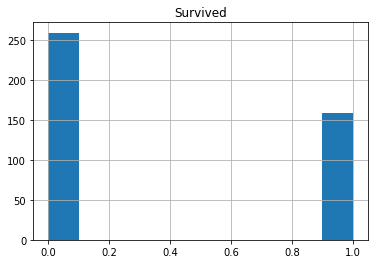

In [26]:
dados_env.hist('Survived') # Está Coerente

In [27]:
#Salvar dados

dados_env.to_csv('./Attempt_3_Titanic_Predictions.csv',index=False)

